# Investigate KDP and PhiDP through a Convective Core near SAIL

Within this notebook, we explore how to visualize, and analyze dual-pol fields from the SAIL field campaign using Xradar

## Imports

In [1]:
import xradar as xd
import xarray as xr
import pyart
import hvplot.xarray
import matplotlib.pyplot as plt
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


## Read the Data

In [3]:
radar = xd.io.open_cfradial1_datatree('../../data/sample-radar/test-pol.nc', first_dim='auto')

## Georeference the Dataset

In [4]:
first_sweep = radar['sweep_0'].to_dataset()
geo_ds = xd.georeference.get_x_y_z(first_sweep)

## Plot PPIs

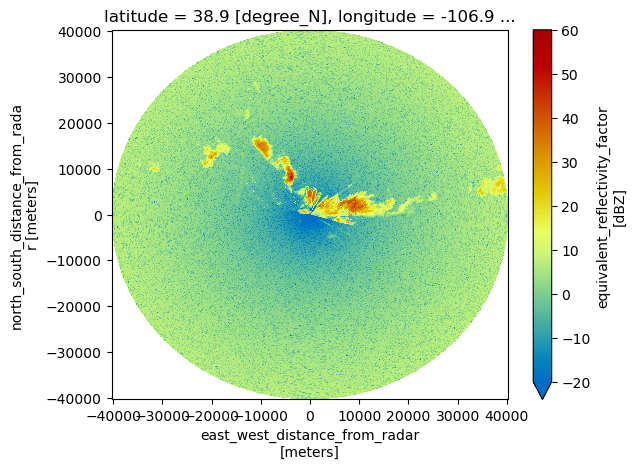

In [5]:
geo_ds.DBZ.plot(x='x', y='y', vmin=-20, vmax=60, cmap='pyart_HomeyerRainbow');

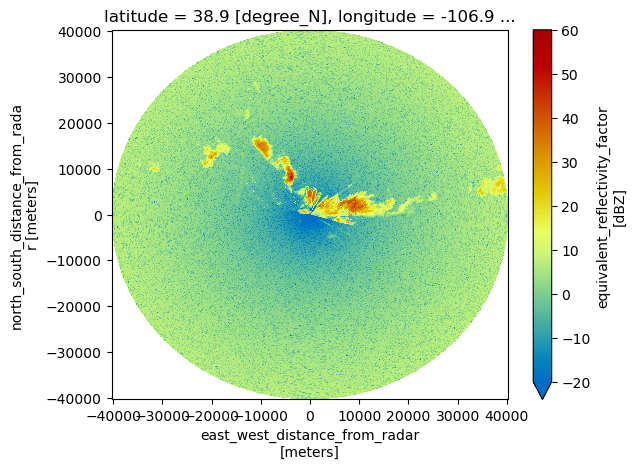

In [6]:
geo_ds.DBZ.plot(x='x', y='y', vmin=-20, vmax=60, cmap='pyart_HomeyerRainbow')

## Clean up the Azimuths

In [7]:
geo_ds = geo_ds.drop_duplicates('azimuth')

## Plot individual sectors

We start first by slicing for the desired azimuths

In [8]:
sector = geo_ds.sel(azimuth=slice(329, 340))

(0.0, 10000.0)

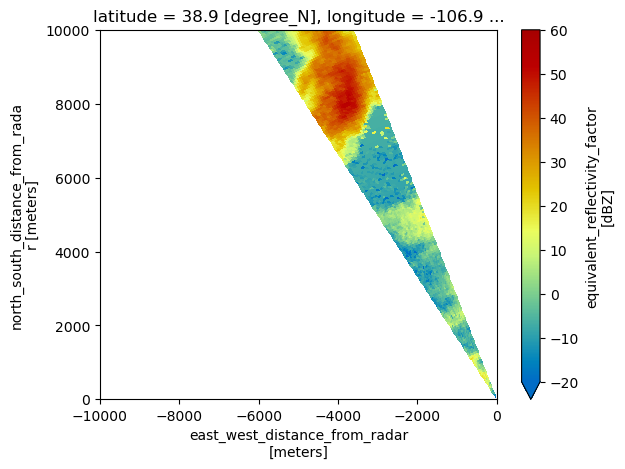

In [9]:
sector.DBZ.plot(x='x',
                y='y',
                cmap='pyart_HomeyerRainbow',
                vmin=-20,
                vmax=60)
plt.xlim(-10_000, 0)
plt.ylim(0, 10_000)

(0.0, 10000.0)

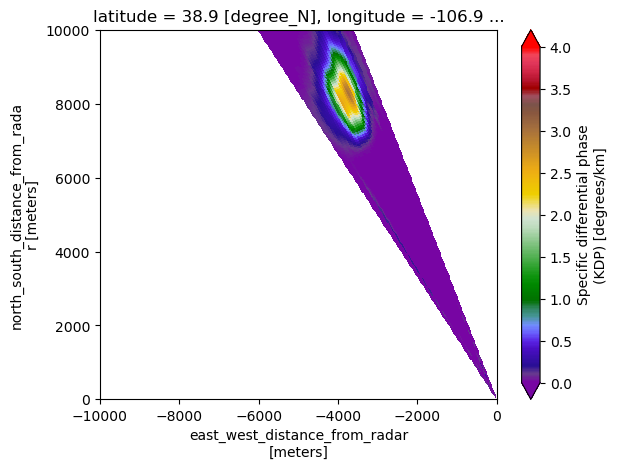

In [10]:
sector.KDP_LP.plot(x='x', y='y', cmap='pyart_Carbone42', vmin=0, vmax=4)
plt.xlim(-10_000, 0)
plt.ylim(0, 10_000)

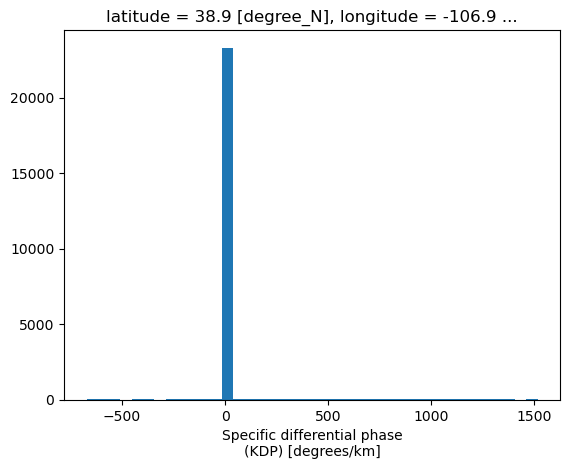

In [11]:
sector.KDP_LP.plot.hist(bins = 40);

(0.0, 10000.0)

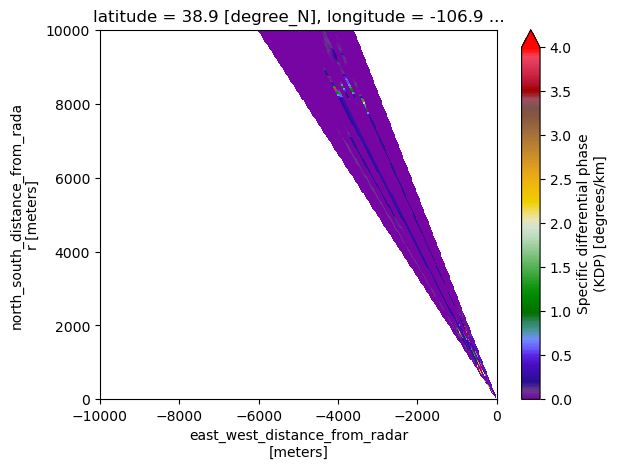

In [12]:
sector.KDP_maesaka.plot(x='x', y='y', cmap='pyart_Carbone42', vmin=0, vmax=4)
plt.xlim(-10_000, 0)
plt.ylim(0, 10_000)

### Select a single ray, using an azimuth

In [13]:
azimuth_subset = geo_ds.sel(azimuth=336, method='nearest')

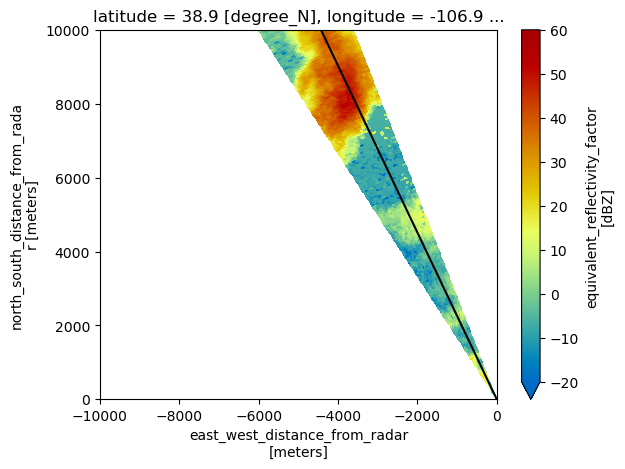

In [14]:
sector.DBZ.plot(x='x', y='y', cmap='pyart_HomeyerRainbow', vmin=-20, vmax=60)
plt.xlim(-10_000, 0)
plt.ylim(0, 10_000)
plt.plot(azimuth_subset.x, azimuth_subset.y, color='k')

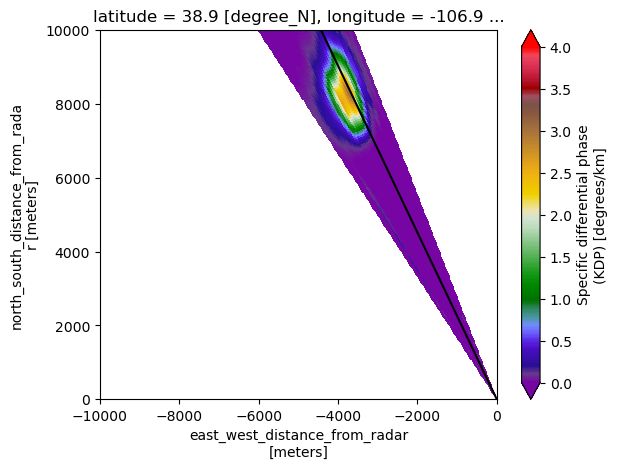

In [15]:
sector.KDP_LP.plot(x='x', y='y', cmap='pyart_Carbone42', vmin=0, vmax=4)
plt.xlim(-10_000, 0)
plt.ylim(0, 10_000)
plt.plot(azimuth_subset.x, azimuth_subset.y, color='k');

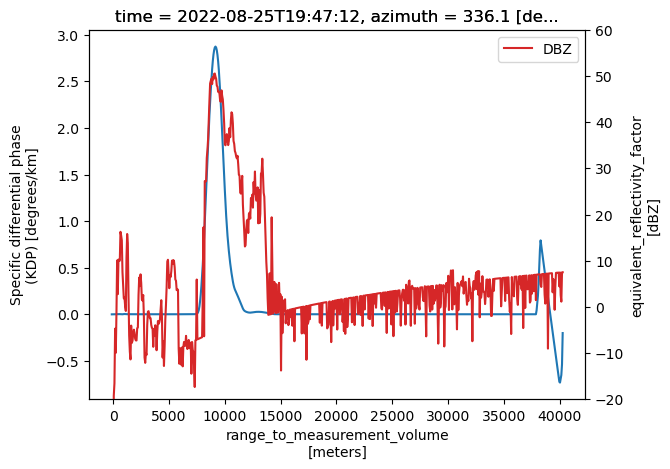

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
azimuth_subset.KDP_LP.plot(ax=ax,
                           color='tab:blue',
                           label='KDP')


ax2 = ax.twinx()
azimuth_subset.DBZ.plot(ax=ax2,
                        color='tab:red',
                        ylim=(-20, 60),
                        label='DBZ')
plt.legend();

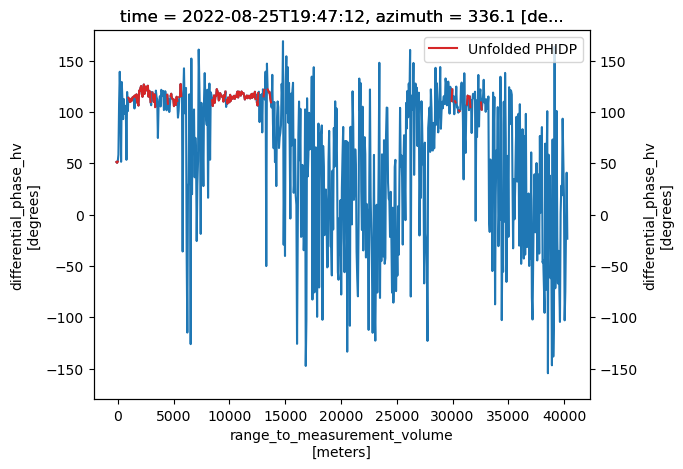

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
azimuth_subset.PHIDP.plot(ax=ax,
                          color='tab:blue',
                          ylim=(-180, 180),
                          label='KDP')


ax2 = ax.twinx()
azimuth_subset.PHIDP_UF.plot(ax=ax2,
                             ylim=(-180, 180),
                             color='tab:red',
                             label='Unfolded PHIDP')
plt.legend();

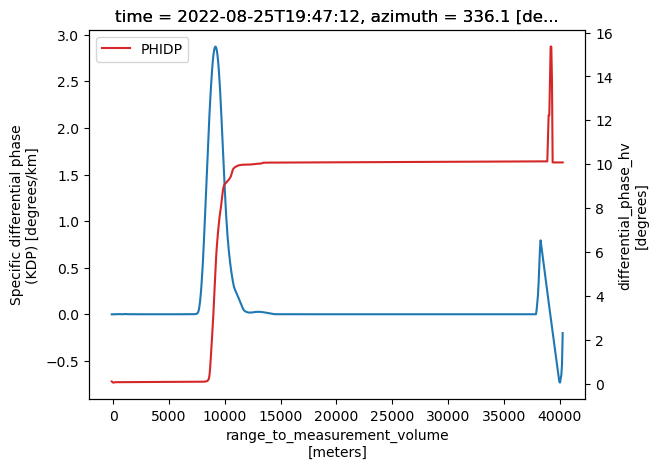

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
azimuth_subset.KDP_LP.plot(ax=ax,
                           color='tab:blue',
                           label='KDP')


ax2 = ax.twinx()
azimuth_subset.PHIDP_LP.plot(ax=ax2,
                             color='tab:red',
                             label='PHIDP')
plt.legend();

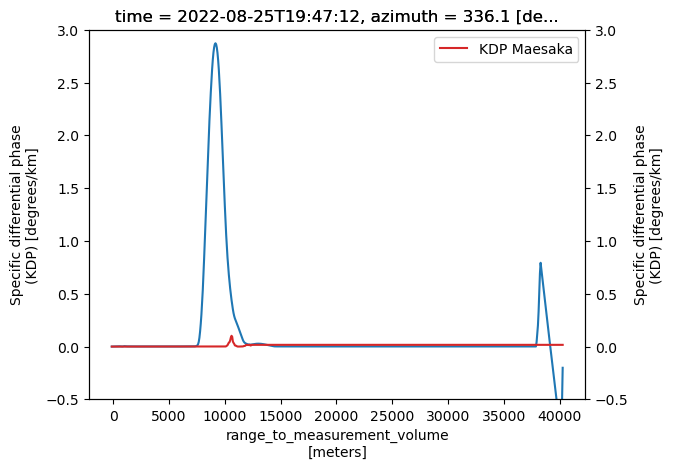

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
azimuth_subset.KDP_LP.plot(ax=ax,
                           ylim=(-0.5, 3),
                           color='tab:blue',
                           label='KDP')


ax2 = ax.twinx()
azimuth_subset.KDP_maesaka.plot(ax=ax2,
                                ylim=(-0.5, 3),
                                color='tab:red',
                                label='KDP Maesaka')
plt.legend();